In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/sai/Documents/great lakes/New batch/New folder/DSE-Aug20-SLC-BLR-Feb8-11/SMSSpamCollection.csv")

In [3]:
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['Class'].value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [5]:
df['Class'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Class, dtype: float64

In [6]:
df['Class']=df['Class'].map({'ham':0,'spam':1})

In [7]:
y=df['Class']
x=df['sms']
y.shape,x.shape

((5572,), (5572,))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

In [11]:
vect.fit(x_train)
x_traint=vect.transform(x_train)
x_testt=vect.transform(x_test)

In [12]:
x_traint.shape

(3900, 7004)

In [13]:
x_testt.shape

(1672, 7004)

In [14]:
vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve

In [16]:
mnb=MultinomialNB()

In [17]:
mnb.fit(x_traint,y_train)

y_train_pred=mnb.predict(x_traint)
y_train_prob=mnb.predict_proba(x_traint)[:,1]

print('Train - Confusion Matrix:','\n', confusion_matrix(y_train, y_train_pred))
print('Train - Accuracy score:','\n', accuracy_score(y_train, y_train_pred))
print('Train - AUC:',roc_auc_score(y_train, y_train_prob))

Train - Confusion Matrix: 
 [[3363   14]
 [   8  515]]
Train - Accuracy score: 
 0.9943589743589744
Train - AUC: 0.998299711636076


In [18]:
y_test_pred=mnb.predict(x_testt)
y_test_prob=mnb.predict_proba(x_testt)[:,1]

print('Test - Confusion Matrix:','\n', confusion_matrix(y_test, y_test_pred))
print('Test - Accuracy score:','\n', accuracy_score(y_test, y_test_pred))
print('Test - AUC:',roc_auc_score(y_test, y_test_prob))

Test - Confusion Matrix: 
 [[1438   10]
 [  11  213]]
Test - Accuracy score: 
 0.9874401913875598
Test - AUC: 0.9851950966850829


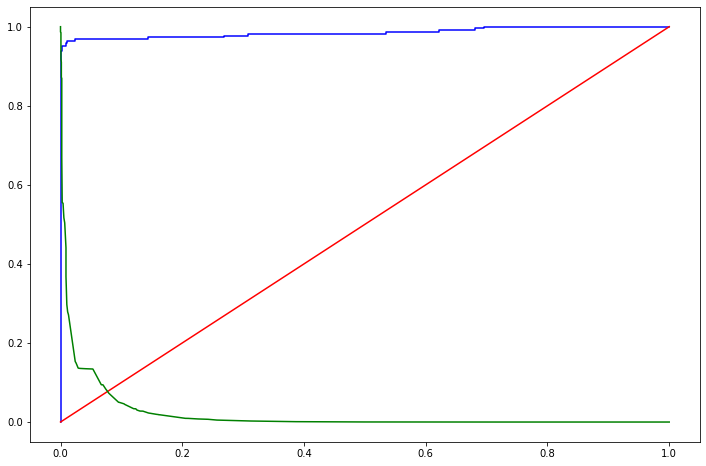

In [22]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
thresholds[0]=thresholds[0]-1
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,'b')
plt.plot(fpr,fpr,'r')
plt.plot(fpr,thresholds,'g')
plt.show()

In [24]:
diff=fpr-tpr

In [20]:
spm=pd.DataFrame({'fpr':fpr,'tpr':tpr,'thresholds':thresholds})
spm.head()

,fpr,tpr,thresholds
0,0.0,0.000000,1.0
1,0.0,0.276786,1.0
2,0.0,0.321429,1.0
3,0.0,0.339286,1.0
4,0.0,0.343750,1.0


In [21]:
spm[(spm['fpr']==0) &(spm['tpr']>0.5)]

,fpr,tpr,thresholds
16,0.0,0.723214,0.999999
17,0.0,0.732143,0.999998
18,0.0,0.758929,0.999991
19,0.0,0.767857,0.999990
20,0.0,0.799107,0.999956
21,0.0,0.808036,0.999950
22,0.0,0.816964,0.999923
23,0.0,0.825893,0.999918
24,0.0,0.915179,0.986525


In [28]:
spm[spm['diff']==max(diff)]

,fpr,tpr,thresholds,diff
0,0.0,0.0,1.000000e+00,0.0
144,1.0,1.0,1.562018e-40,0.0


In [26]:
spm

,fpr,tpr,thresholds,diff
0,0.000000,0.000000,1.000000e+00,0.000000
1,0.000000,0.276786,1.000000e+00,-0.276786
2,0.000000,0.321429,1.000000e+00,-0.321429
3,0.000000,0.339286,1.000000e+00,-0.339286
4,0.000000,0.343750,1.000000e+00,-0.343750
...,...,...,...,...
140,0.983425,1.000000,6.333014e-15,-0.016575
141,0.984807,1.000000,6.207424e-15,-0.015193
142,0.997238,1.000000,2.180344e-22,-0.002762
143,0.998619,1.000000,4.887612e-23,-0.001381
